# <center> CCT College Dublin </center>

## <center> Assessment Cover Page</center>


<br><br><br>
---

<span style="font-size:larger;">

**Module Title:**&nbsp;&nbsp;&nbsp;Data Preparation
	
**Assessment Title:**&nbsp;&nbsp;&nbsp;Machine Learning (10 ETCS)
	
**Lecturer Name:**&nbsp;&nbsp;&nbsp;Dr. Muhammad Iqbal
	
**Student Full Name:**&nbsp;&nbsp;&nbsp;Yumiko Maria Bejarano Azogue 
	
**Student Number:**&nbsp;&nbsp;&nbsp;2024144
	
**Assessment Due Date:**&nbsp;&nbsp;&nbsp;21st April 2024
	
**Date of Submission:**&nbsp;&nbsp;&nbsp;21st April 2024
    
</span> 

<br><br><br>

---

#### Declaration 

```
By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.
```
<br><br><br>

--- 

In [ ]:
# Import all the required libariers 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Set the style for seaborn
sns.set_style("whitegrid")

In [2]:
# Import thi slibrary to suppress the warnings
import warnings
# The object 'warnings' is used to call the method 'filterwarnings' and ignore the warnings
warnings.filterwarnings('ignore')  

In [3]:
# Import the data file
data = pd.read_csv('collegePlace.csv')

# The dataset has the following columns:

## Feature Descriptions

| Feature            | Description                                                        | Data Type |
|--------------------|--------------------------------------------------------------------|-----------|
| Age                | Age At The Time Of Final Year                                      | int64     |
| Gender             | Gender Of Candidate                                                | object    |
| Stream             | Engineering Stream That The Candidate Belongs To                   | object    |
| Internships        | Number Of Internships Undertaken During The Course Of       Stream | int64     |
| CGPA               | CGPA Till 6th Semester                                             | int64     |
| Hostel             | Whether Student Lives In College Accommodation                      | int64     |
| HistoryOfBacklogs  | Whether Student Ever Had Any Backlogs In Any Subjects              | int64     |
| PlacedOrNot        | Target Variable                                                    | int64     |
       |


In [4]:
# Display the first 5 records of the dataset
print("First 5 records of the dataset:")
print(data.head())

First 5 records of the dataset:
   Age  Gender                         Stream  Internships  CGPA  Hostel  \
0   22    Male  Electronics And Communication            1     8       1   
1   21  Female               Computer Science            0     7       1   
2   22  Female         Information Technology            1     6       0   
3   21    Male         Information Technology            0     8       0   
4   22    Male                     Mechanical            0     8       1   

   HistoryOfBacklogs  PlacedOrNot  
0                  1            1  
1                  1            1  
2                  0            1  
3                  1            1  
4                  0            1  


# Meta information of Dataframe

In [6]:
# Information about the dataframe
print("\nInformation about the dataframe:")
data_info = data.info()
pd.DataFrame(data_info).transpose()


Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


""


In [7]:
column_types = pd.DataFrame(data.dtypes, columns=['Data Types'])
column_types

,Data Types
Age,int64
Gender,object
Stream,object
Internships,int64
CGPA,int64
Hostel,int64
HistoryOfBacklogs,int64
PlacedOrNot,int64


In [8]:
# Descriptive statistics of the dataframe
print("\n Descriptive statistics of the dataframe:")

# Generate descriptive statistics for the DataFrame and transpose it for readability
descriptive_stats = data.describe().T
#print(descriptive_stats)

# Apply a bar chart style to the 'mean' column
styled_stats = descriptive_stats.style.bar(subset=['mean'], color='#205ff2')

# Apply a background gradient based on standard deviation
styled_stats = styled_stats.background_gradient(subset=['std'], cmap='Reds')

# Apply a background gradient based on the 50th percentile
styled_stats = styled_stats.background_gradient(subset=['50%'], cmap='coolwarm')

# Display the styled statistics
styled_stats



 Descriptive statistics of the dataframe:


,count,mean,std,min,25%,50%,75%,max
Age,2966.000000,21.485840,1.324933,19.000000,21.000000,21.000000,22.000000,30.000000
Internships,2966.000000,0.703641,0.740197,0.000000,0.000000,1.000000,1.000000,3.000000
CGPA,2966.000000,7.073837,0.967748,5.000000,6.000000,7.000000,8.000000,9.000000
Hostel,2966.000000,0.269049,0.443540,0.000000,0.000000,0.000000,1.000000,1.000000
HistoryOfBacklogs,2966.000000,0.192178,0.394079,0.000000,0.000000,0.000000,0.000000,1.000000
PlacedOrNot,2966.000000,0.552596,0.497310,0.000000,0.000000,1.000000,1.000000,1.000000


In [9]:
# Descriptive statistics of the dataframe
print("\nDescriptive statistics of the dataframe:")
print(data.describe().loc[['mean', 'min', 'max']].T)


Descriptive statistics of the dataframe:
                        mean   min   max
Age                21.485840  19.0  30.0
Internships         0.703641   0.0   3.0
CGPA                7.073837   5.0   9.0
Hostel              0.269049   0.0   1.0
HistoryOfBacklogs   0.192178   0.0   1.0
PlacedOrNot         0.552596   0.0   1.0


In [10]:
print("\nChecking for missing values:")
print(data.isnull().sum())
print("Number of numerical variables: ", len(data.select_dtypes(include=['int64', 'float64']).columns))
print("Numeric Column names:", data.select_dtypes(include=['int64', 'float64']).columns)



Checking for missing values:
Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64
Number of numerical variables:  6
Numeric Column names: Index(['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs',
       'PlacedOrNot'],
      dtype='object')


### Descriptive Statistics Summary:

- Age ranges from 19 to 30 years old.
- The lowest number of internships recorded is 0 (no internships), while the highest is 3.
- Most students did not reside in a hostel (average hostel occupancy is below 0.5).
- Most students have no backlogs (average backlog count is below 0.5).
- The majority of students have been successfully placed in jobs (placement rate is above 0.5).
0.5).

In [11]:
# Renamed Columns
data.rename(columns={'HistoryOfBacklogs': 'backlogs', 'PlacedOrNot': 'placed'}, inplace=True)

In [12]:
#  transformed into lowercase
data = data.rename(columns=str.lower)

###  Checking for NaN values

Fortunately data has no missing value


In [14]:
# Checking if our dataset contains any NULL values
print("\nChecking for missing values:")
data.isnull().sum()


Checking for missing values:


age            0
gender         0
stream         0
internships    0
cgpa           0
hostel         0
backlogs       0
placed         0
dtype: int64

# Exploratory Data Analysis (EDA) and visualization

In [15]:
# Define palette with colors for placed and not placed
palette =['#d74a49', '#92ba92'] # (yes,no)
#92ba92

In [17]:
numeric_df = data.select_dtypes(include=['number'])

In [18]:
# list of numerical variables
numerical_features = data.select_dtypes(include=['number'])

print('Number of numerical variables: ', len(numerical_features))
print('\n')

print('Numeric Column names:', numerical_features.columns)
print('\n')

# visualise the numerical variables
data[numerical_features.columns].head()


Number of numerical variables:  2966


Numeric Column names: Index(['age', 'internships', 'cgpa', 'hostel', 'backlogs', 'placed'], dtype='object')




,age,internships,cgpa,hostel,backlogs,placed
0,22,1,8,1,1,1
1,21,0,7,1,1,1
2,22,1,6,0,0,1
3,21,0,8,0,1,1
4,22,0,8,1,0,1


In [19]:
# Calculates Skewness measures the asymmetry of a distribution
skewness = numeric_df.skew()
skewness

age            0.996099
internships    0.789343
cgpa           0.006222
hostel         1.042100
backlogs       1.563290
placed        -0.211665
dtype: float64

### Age Distribution by Gender

In [20]:
# Creating a DataFrame to count the occurrences of each unique 'age' value in the entire dataset
age_counts_df = pd.DataFrame(data['age'].value_counts()).reset_index()

# Renaming the columns of the DataFrame
age_counts_df.columns = ['Unique Age Values', 'Counts']

# Displaying the DataFrame showing the count of unique 'age' values in the entire dataset
print(age_counts_df)

    Unique Age Values  Counts
0                  21    1084
1                  22     941
2                  20     375
3                  23     195
4                  19     156
5                  24     131
6                  26      50
7                  25      29
8                  28       3
9                  30       1
10                 29       1


In [21]:
# Grouping the data by 'gender' and counting the occurrences of each unique 'age' value within each group
age_counts_by_gender = data.groupby('gender')['age'].value_counts().reset_index(name='Counts')

# Displaying the DataFrame showing the count of unique 'age' values for each gender
print(age_counts_by_gender)

    gender  age  Counts
0   Female   21     185
1   Female   22     169
2   Female   20      56
3   Female   23      29
4   Female   19      18
5   Female   24      18
6   Female   26      10
7   Female   25       4
8   Female   28       1
9   Female   29       1
10    Male   21     899
11    Male   22     772
12    Male   20     319
13    Male   23     166
14    Male   19     138
15    Male   24     113
16    Male   26      40
17    Male   25      25
18    Male   28       2
19    Male   30       1


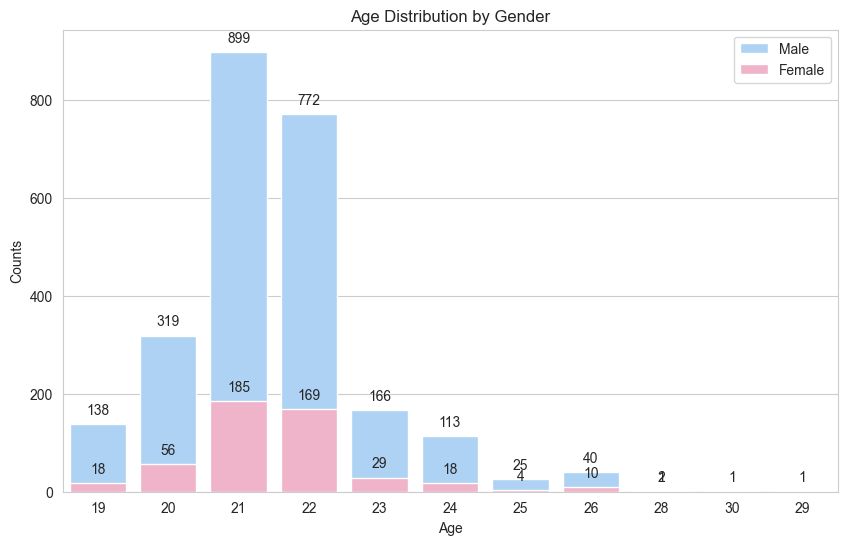

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the data
plt.figure(figsize=(10, 6))

# Plotting age distribution for males (Lightblue)
sns.barplot(x='age', y='Counts', data=age_counts_by_gender[age_counts_by_gender['gender'] == 'Male'], color='#a2d2ff', label='Male')

# Plotting age distribution for females (Magenta)
sns.barplot(x='age', y='Counts', data=age_counts_by_gender[age_counts_by_gender['gender'] == 'Female'], color='#faaac7', label='Female')

# Adding total count in each bar
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Distribution by Gender')

plt.legend()
plt.show()


## Placement Details by Gender

In [23]:
# Placement Details by Gender
# Data extraction
male = data[data['gender'] == "Male"]
female = data[data['gender'] == "Female"]
total_male = male.shape[0]
total_female = female.shape[0]
total_male_pass = male[male['placed'] == 1].shape[0]
total_female_pass = female[female['placed'] == 1].shape[0]

In [24]:
# Calculation of pass percentages
pass_male_percentage = np.round((total_male_pass * 100) / total_male, 2)
pass_female_percentage = np.round((total_female_pass * 100) / total_female, 2)


In [25]:
# Details dictionary
details = {"Total Male": [total_male],
           "Total Female": [total_female],
           "Total male pass": [total_male_pass],
           "Total female pass": [total_female_pass],
           "% of Passed Male": [pass_male_percentage],
           "% of Passed Female": [pass_female_percentage]}

details

{'Total Male': [2475],
 'Total Female': [491],
 'Total male pass': [1364],
 'Total female pass': [275],
 '% of Passed Male': [55.11],
 '% of Passed Female': [56.01]}

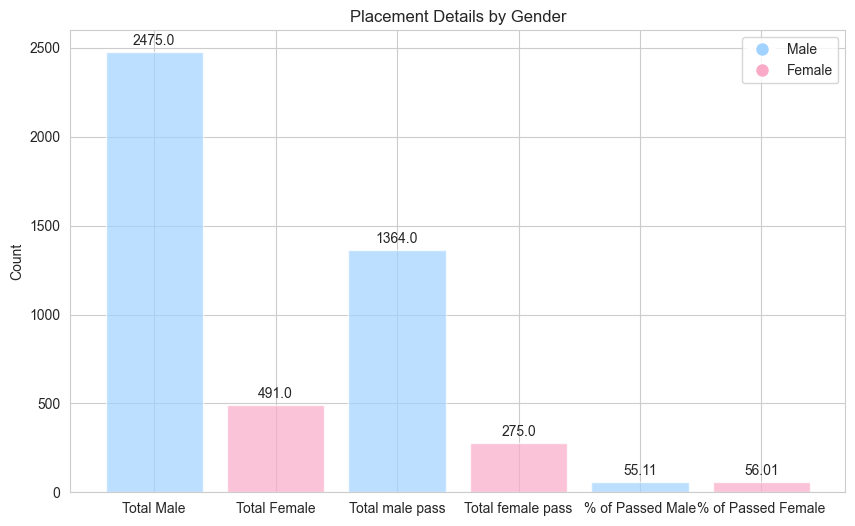

In [26]:
# Plotting the details in a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Data for plotting
categories = list(details.keys())
values = list(details.values())  # Convert dict_values object to a list
values = [item for sublist in values for item in sublist]  # Flatten the list
colors = ['#a2d2ff', '#faaac7']

# Plotting the data
bars = ax.bar(categories, values, color=colors, alpha=0.7)

# Adding text on each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_ylabel('Count')
ax.set_title('Placement Details by Gender')

# Custom legend with both male and female labels
female_patch = plt.Line2D([0], [0], marker='o', color='w', label='Female', markerfacecolor='#faaac7', markersize=10)
male_patch = plt.Line2D([0], [0], marker='o', color='w', label='Male', markerfacecolor='#a2d2ff', markersize=10)

ax.legend(handles=[male_patch, female_patch])

# Display the plot
plt.show()


In [27]:
# Drop non-numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

correlation_matrix

,age,internships,cgpa,hostel,backlogs,placed
age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
cgpa,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
backlogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
placed,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


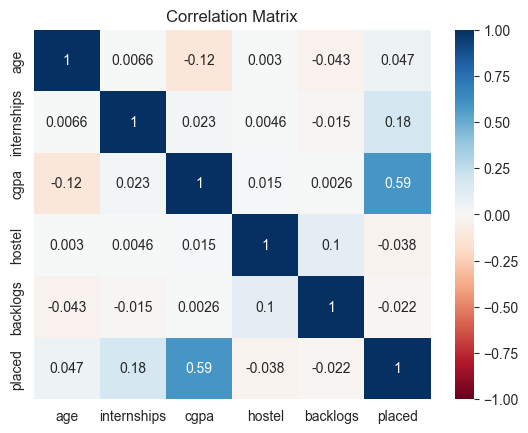

In [28]:
# Plot the correlation matrix heatmap
sns.heatmap(correlation_matrix, cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [29]:
def num_plot(df, col, title, palette):
    fig, ax = plt.subplots(2, 1, figsize=(5.2, 5), gridspec_kw={"height_ratios": (.1, .9)})
    ax[0].set_title(title, fontsize=18)
    sns.boxplot(y=pd.to_numeric(df['placed']), x=col, data=df, orient='h', ax=ax[0], palette=palette)
    ax[0].set(yticks=[])
    ax[0].set_ylabel('')
    ax[0].set_xlabel('')
    sns.countplot(x=col, data=df, ax=ax[1], hue=pd.to_numeric(df['placed']), palette=palette)
    ax[1].set_xlabel(col, fontsize=16)
    ax[1].set_yticks([])
    for container in ax[1].containers:
        ax[1].bar_label(container, fmt='%.1f')
    plt.legend(title='Placed?', title_fontsize=14, labels=['no', 'yes'], fontsize=13, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()


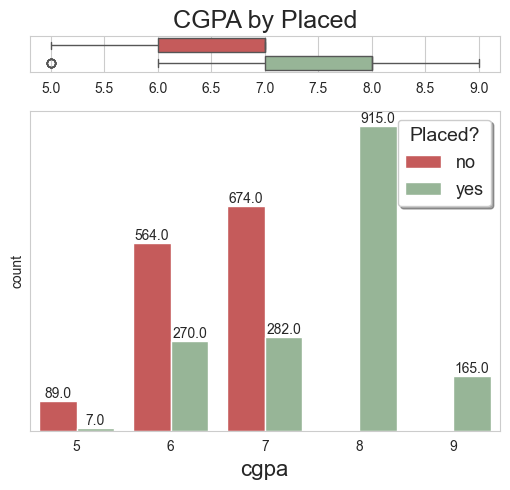

In [30]:
# CGPA affect job placement.
num_plot(data, 'cgpa', 'CGPA by Placed',palette)



In [31]:
data.loc[(data['cgpa'] == 5) & (data['placed'] == 1)]

,age,gender,stream,internships,cgpa,hostel,backlogs,placed
118,24,Male,Information Technology,3,5,0,1,1
122,23,Male,Information Technology,1,5,0,0,1
137,24,Male,Information Technology,0,5,0,0,1
140,23,Male,Computer Science,1,5,0,0,1
143,24,Male,Computer Science,2,5,0,0,1
144,24,Male,Computer Science,2,5,0,0,1
152,23,Male,Computer Science,1,5,0,0,1


In [32]:
df_1 = data.loc[((data['age'] == 23) | (data['age'] == 24)) & (data['gender'] == 'Male') &
 ((data['stream'] == 'Information Technology') | (data['stream'] == 'Computer Science')) & (data['placed'] == 1)]

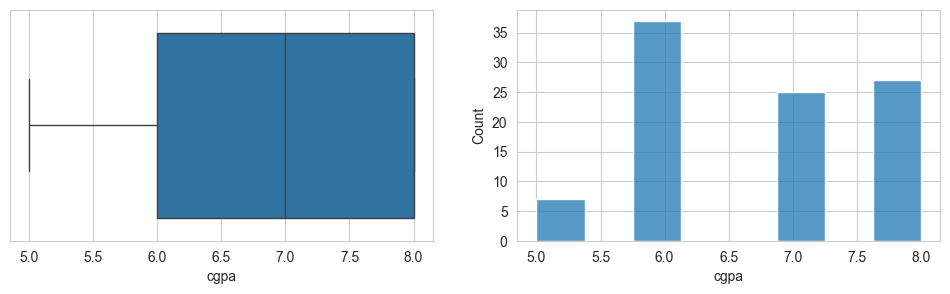

In [33]:
fig, ax = plt.subplots(1,2, figsize=(12,3))
sns.boxplot(ax=ax[0], x='cgpa', data=df_1)
sns.histplot(ax=ax[1], x='cgpa', data=df_1)
plt.show()

In [34]:
# Removed outliers
df_clean = data.drop(list(data.loc[(data['cgpa'] == 5) & (data['placed'] == 1)].index))

print('Removed {} outliers !'.format(len(data)-len(df_clean)))

Removed 7 outliers !


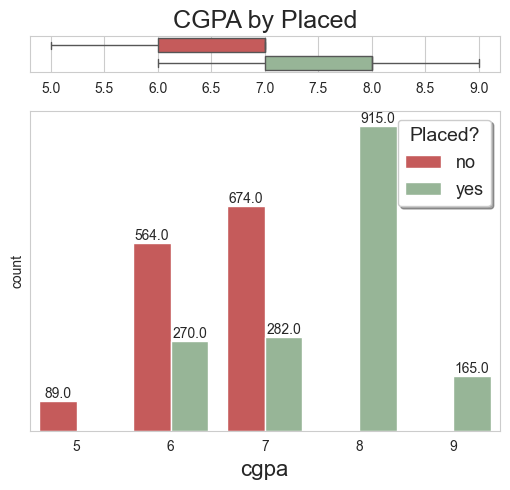

In [35]:
#plots cleaned dataset
num_plot(df_clean, 'cgpa', 'CGPA by Placed', palette)


In [ ]:
df_clean.shape

In [ ]:
df_clean.info()

# EncodingSince there is no order/hierarchy among the categorical features, they will be encoded by *One hot encoding* (using pd.get_dummies).

In [36]:
df_encoded = pd.get_dummies(df_clean, drop_first=True)

df_encoded.head()

,age,internships,cgpa,hostel,backlogs,placed,gender_Male,stream_Computer Science,stream_Electrical,stream_Electronics And Communication,stream_Information Technology,stream_Mechanical
0,22,1,8,1,1,1,True,False,False,True,False,False
1,21,0,7,1,1,1,False,True,False,False,False,False
2,22,1,6,0,0,1,False,False,False,False,True,False
3,21,0,8,0,1,1,True,False,False,False,True,False
4,22,0,8,1,0,1,True,False,False,False,False,True


## Splitting the data into training, testing, and validation sets   

The last step in data preprocessing is to split the data into training, testing, and validation sets:
* Training set: The neural network will be trained on this subset of the data.
* Validation set: This set of data allows us to perform hyperparameter tuning (that is, tuning the number of hidden layers) using an unbiased source of data.
* Testing set: The final evaluation of the neural network will be based on this subset of the data.

# First, let's separate the dataset into X (input features) and y (target variable):

In [37]:
# splitting the dataset into x(independent variables) and y(dependent variables)
X = df_encoded.drop('placed', axis=1)

y = df_encoded['placed']

print(X.shape)
print(y.shape)

(2959, 11)
(2959,)


In [38]:
X.shape

(2959, 11)

#### Then, make the first split to split the data into the training set (80%) and the testing set (20%) according to the preceding diagram:

In [39]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2367, 11), (2367,), (592, 11), (592,))

In [40]:
# Feature Scaling 
# Only on Independent Variable to convert them into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

X_train = pd.DataFrame(X_train)
X_train.head()


,0,1,2,3,4,5,6,7,8,9,10
0,-0.364244,-0.956351,-1.106575,1.671308,-0.487159,0.450949,-0.611365,-0.348238,-0.403912,-0.548224,2.488881
1,1.135173,1.730513,-1.106575,-0.598334,-0.487159,-2.217544,-0.611365,-0.348238,-0.403912,1.824072,-0.401787
2,0.385465,-0.956351,-0.070064,-0.598334,-0.487159,0.450949,-0.611365,-0.348238,2.475786,-0.548224,-0.401787
3,-0.364244,-0.956351,-0.070064,-0.598334,-0.487159,0.450949,1.635685,-0.348238,-0.403912,-0.548224,-0.401787
4,0.385465,-0.956351,-1.106575,1.671308,2.052719,0.450949,-0.611365,-0.348238,-0.403912,-0.548224,2.488881


# Model building

In [ ]:
# Fixing a random seed ensures reproducible results
import numpy as np
import random
import tensorflow
tensorflow.random.set_seed(9)
np.random.seed(1)
random.seed(1)

In [ ]:
import keras
from keras.models import Sequential

model = Sequential()

In [ ]:
# Let's add the first hidden layer:
from keras.layers import Dense

colum = X_train.shape[1]

# Add the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = colum))


In [ ]:
# Add the second hidden layer
model.add(Dense(16, activation = 'relu'))

In [ ]:
# Now we add the output layer as follows:
# Add the output layer
model.add(Dense(1, activation = 'sigmoid'))

# Model compilation

In [ ]:
# Then, we can run the compile() function as follows:
    # Compile the model
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Model training

In [ ]:
X_train.shape

In [ ]:
# To train our MLP model defined in earlier steps, let's call the fit function. Let's train our model for 200 iterations:
# Train the model for 200 epochs
model.fit(X_train, y_train, epochs = 10) # 200

# Results analysis
Having successfully trained our MLP, let's evaluate our model based on the testing accuracy, confusion matrix, and receiver operating characteristic (ROC) curve.

# Testing accuracy
We can evaluate our model on the training set and testing set using the evaluate() function:

In [ ]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

# Confusion matrix

The confusion matrix is a useful visualization tool that provides analysis on the true negative, false positive, false negative, and true positives made by our model. Beyond a simple accuracy metric, we should also look at the confusion matrix to understand the performance of the model.The definition of true negative, false positive, false negative, and true positives are as follows:


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred.flatten()
y_test_pred_new = np.where(y_test_pred.round(2) > 0.5, 1, 0)
c_matrix = confusion_matrix(y_test, y_test_pred_new)
c_matrix

In [ ]:
ax = sns.heatmap(c_matrix, annot=True,
                 xticklabels=['No', 'Yes'],
                 yticklabels=['No', 'Yes'],
                 cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Test")
ax.set_title("Placed ?")
plt.show()

# ROC curve
A receiver operating characteristic curve (ROC) is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

For classification tasks, we should also look at the ROC curve to evaluate our model. The ROC curve is a plot with the True Positive Rate (TPR) on the y axis and the False Positive Rate (FPR) on the x axis.

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_test_pred_probs = model.predict(X_test)

In [ ]:
#Then, run the roc_curve function in order to get the corresponding false positive rate and true positive rate for the ROC curve:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

In [ ]:
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Discussion
From the preceding ROC Curve, we can see that the model performs rather well, close to the model ROC Curve shown in the preceding diagram. This shows that our model is able to differentiate samples of different classes, making good predictions.

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuaracy :", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

## k fold Cross Validation

In [ ]:
# k fold cross validatio

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\nStandard Deviation :", cvs.std())

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

## k fold Cross Validation

In [ ]:
# k fold cross validatio

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\n Standard Deviation :", cvs.std())

# Reference:
Neural Network Projects with Python by James Loy Published by Packt Publishing, 2019
https://www.analyticsvidhya.com/